In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

This project is about data

In [2]:
majors = pd.read_csv('college-majors/recent-grads.csv')
majors.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
stem_women = pd.read_csv('college-majors/women-stem.csv')
stem_women.head()

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000


In [5]:
stem = ['Engineering', 'Physical Sciences', 'Computers & Mathematics', 'Health', 'Biology & Life Science']

majors_stem = majors[majors['Major_category'].isin(stem)]

In [6]:
majors_stem['perc_college_jobs'] = majors_stem['College_jobs'] / majors_stem['Employed']

C:\Users\Beger\AppData\Local\Temp/ipykernel_13388/1697379481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  majors_stem['perc_college_jobs'] = majors_stem['College_jobs'] / majors_stem['Employed']


<AxesSubplot:>

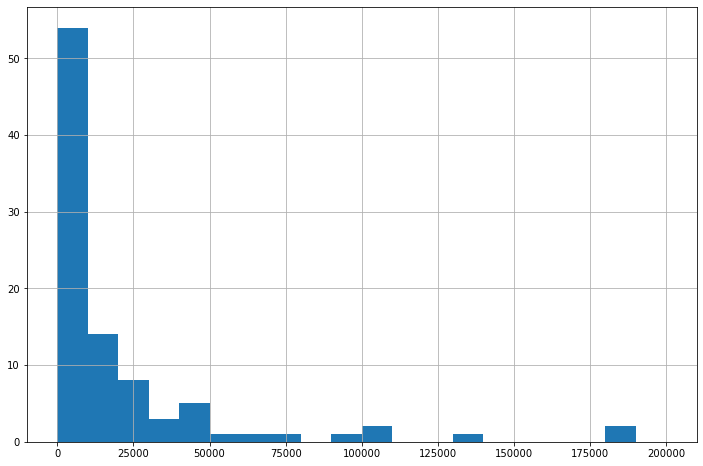

In [6]:
majors_stem['Employed'].hist(bins=20, range=(0,200000), figsize=(12,8))

<AxesSubplot:>

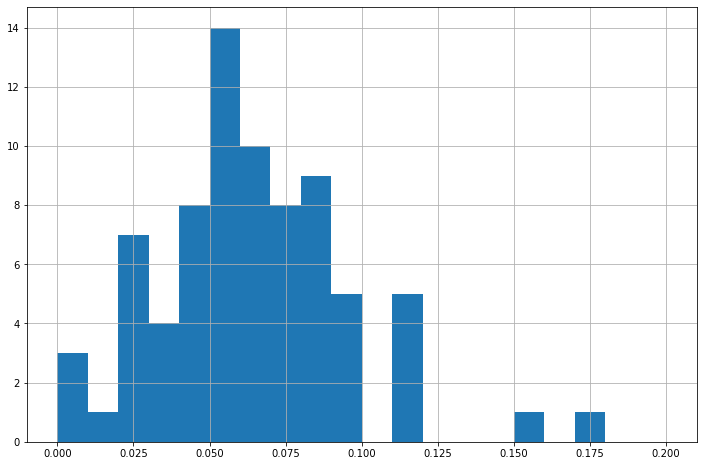

In [7]:
majors_stem['Unemployment_rate'].hist(bins=20, range=(0,0.2), figsize=(12,8))

<AxesSubplot:>

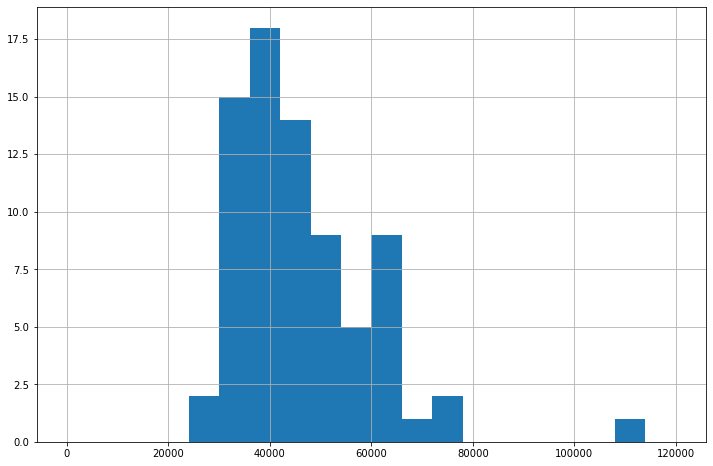

In [8]:
majors_stem['Median'].hist(bins=20, range=(0, 120000), figsize=(12,8))

<AxesSubplot:>

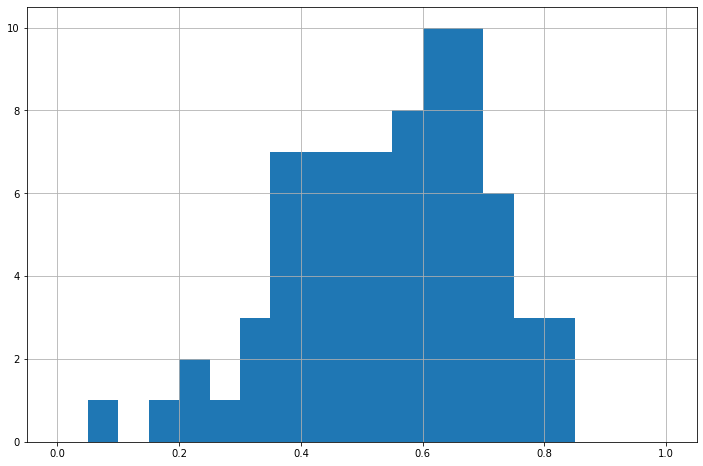

In [9]:
majors_stem['perc_college_jobs'].hist(bins=20, range=(0, 1), figsize=(12,8))

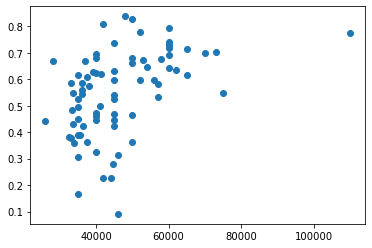

In [10]:
plt.scatter(majors_stem['Median'], majors_stem['perc_college_jobs'])

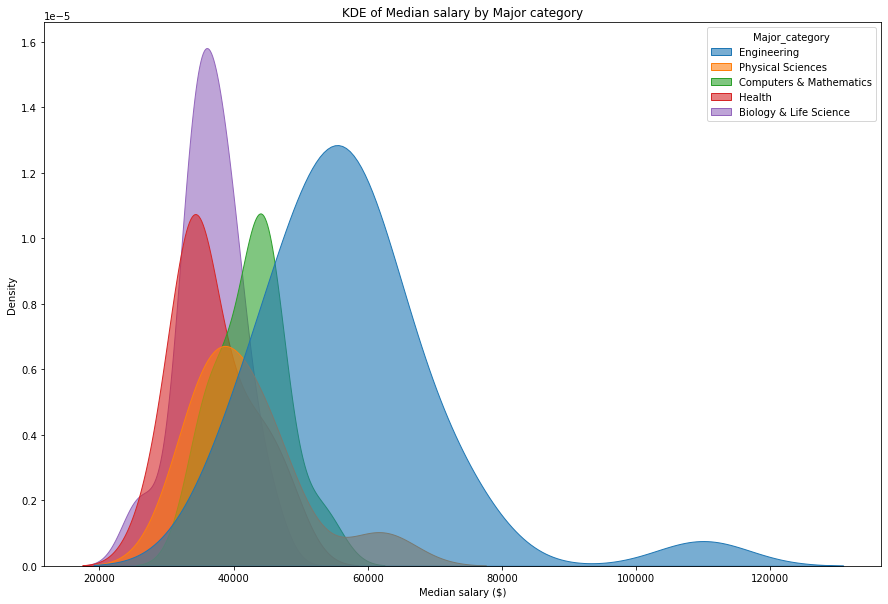

In [11]:
plt.figure(figsize=(15,10))

# Create kde plot and its components 
kde_plot = sns.kdeplot(x = "Median", data = majors_stem, fill = True, alpha = .6, hue = "Major_category", legend = True)
kde_plot.set_title("KDE of Median salary by Major category")
kde_plot.set_xlabel("Median salary ($)")

# Show
plt.show()

<AxesSubplot:xlabel='Median', ylabel='Major_category'>

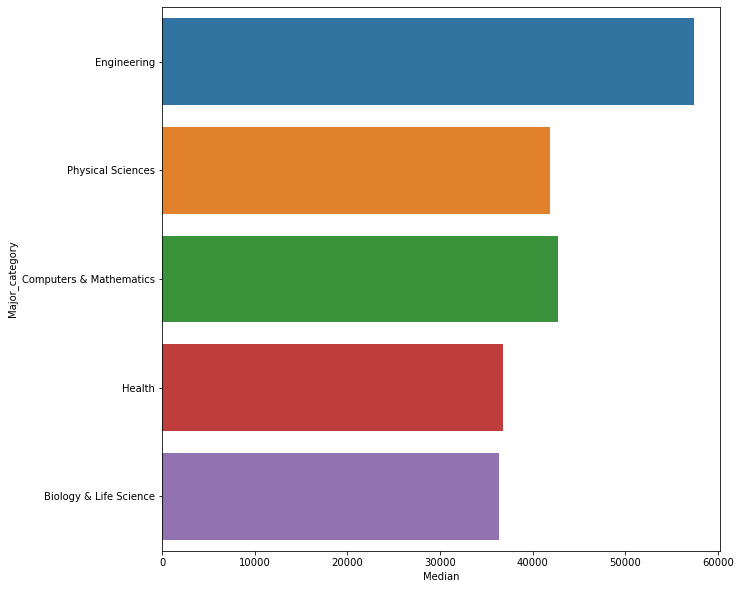

In [12]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'Median', y = 'Major_category', data = majors_stem, orient = 'h', ci = None)

<AxesSubplot:xlabel='Median', ylabel='Major_category'>

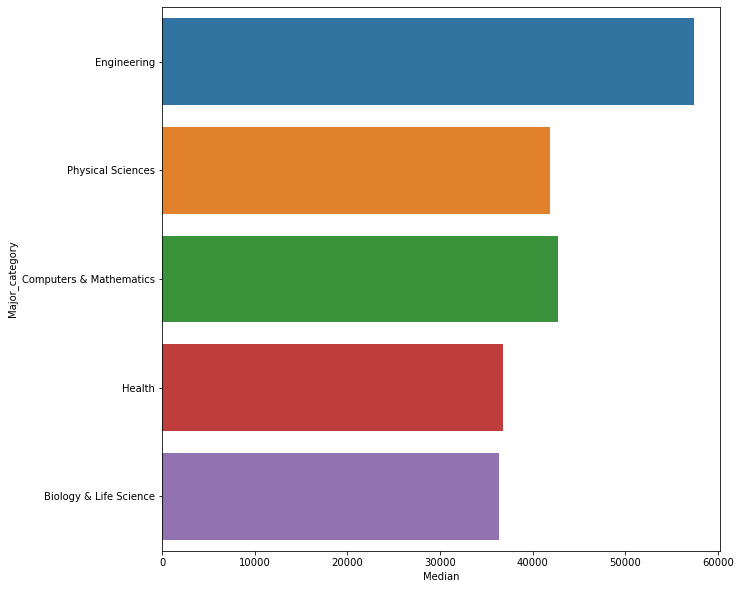

In [4]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'Median', y = 'Major_category', data = stem_women, orient = 'h', ci = None)

<AxesSubplot:xlabel='P75th', ylabel='Major_category'>

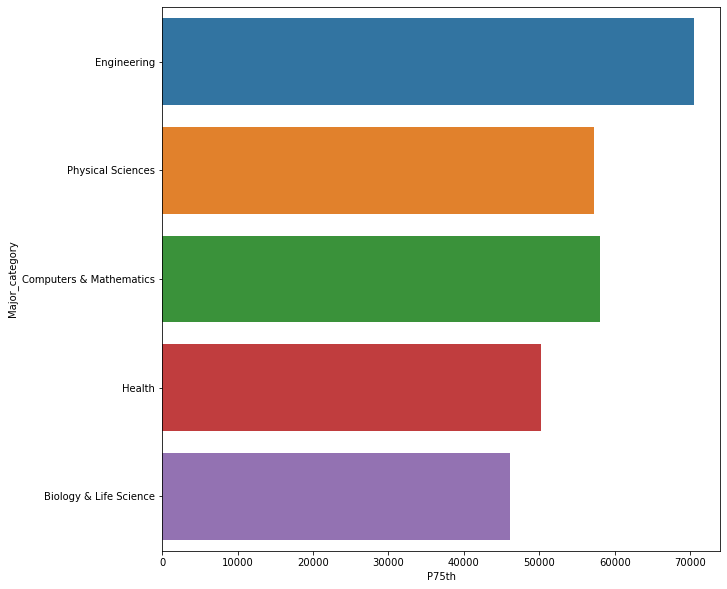

In [13]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'P75th', y = 'Major_category', data = majors_stem, orient = 'h', ci = None)

In [20]:
sum(majors_stem['Women']) / sum(majors_stem['Total'])

0.49831009477289673

<AxesSubplot:xlabel='ShareWomen', ylabel='Major_category'>

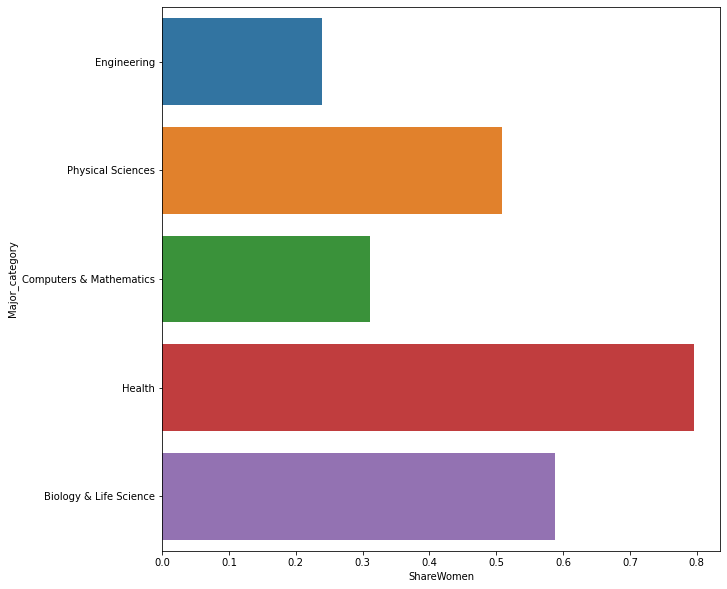

In [16]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'ShareWomen', y = 'Major_category', data = majors_stem, orient = 'h', ci = None)

In [17]:
majors_health = majors_stem[majors_stem['Major_category'] == 'Health']

majors_health.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,perc_college_jobs
34,35,6107,NURSING,209394.0,21773.0,187621.0,Health,0.896019,2554,180903,...,122817,8497,0.044863,48000,39000,58000,151643,26146,6193,0.838256
44,45,6105,MEDICAL TECHNOLOGIES TECHNICIANS,15914.0,3916.0,11998.0,Health,0.753927,190,13150,...,9005,505,0.036983,45000,36000,50000,5546,7176,1002,0.421749
51,52,6104,MEDICAL ASSISTING SERVICES,11123.0,803.0,10320.0,Health,0.927807,67,9168,...,4290,407,0.042507,42000,30000,65000,2091,6948,1270,0.228076
60,61,6108,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,23551.0,8697.0,14854.0,Health,0.630716,38,16620,...,9131,977,0.055521,40000,20000,90000,11573,4493,1121,0.696330
88,89,6199,MISCELLANEOUS HEALTH MEDICAL PROFESSIONS,13386.0,1589.0,11797.0,Health,0.881294,81,10076,...,5868,893,0.081411,36000,23000,42000,5652,3835,1422,0.560937


<AxesSubplot:xlabel='ShareWomen', ylabel='Major'>

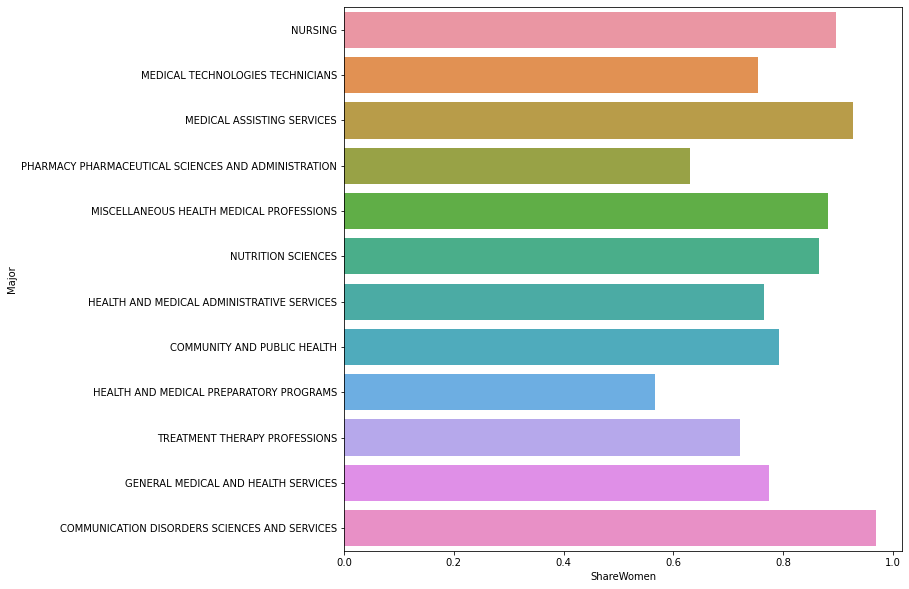

In [18]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'ShareWomen', y = 'Major', data = majors_health, orient = 'h', ci = None)